In [16]:
import numpy as np
import pandas as pd 
import cmath 
import scipy.special as sp
import scipy.signal as spg
import scipy.constants as const
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['legend.fontsize'] = 15

In [4]:
Q5to11 = pd.read_csv('/Users/leayamashiro/whispering_gallery_MAIN/wgm_code/Q_fac_data/Qfac_eigensweep_5to11GHz.csv', skiprows=4)

In [5]:
Q5to11

,% search_freq (Hz),Eigenfrequency (GHz),Frequency (GHz),Quality factor (1)
0,5.000000e+09,4.628162904838757+0.056213986510173126i,4.628163,41.165582
1,5.000000e+09,4.628537993150745+0.056543966106898096i,4.628538,40.928664
2,5.000000e+09,4.6455593170708225+0.018875172634287358i,4.645559,123.060048
3,5.000000e+09,4.646160808283856+0.018871334710491468i,4.646161,123.101012
4,5.000000e+09,4.650254443869332+0.017912079269131024i,4.650254,129.807779
...,...,...,...,...
3271,1.100000e+10,11.097586203363688+0.019153759188844252i,11.097586,289.697341
3272,1.100000e+10,11.098677620714065+0.016451068027523136i,11.098678,337.323923
3273,1.100000e+10,11.099977421129719+0.01715419172190427i,11.099977,323.535425
3274,1.100000e+10,11.100192941908317+0.02127578999332274i,11.100193,260.864413


In [88]:
Q_peaks, _ = spg.find_peaks(Q5to11['Quality factor (1)'])
Q_peak_freqs = Q5to11['Frequency (GHz)'].loc[Q_peaks]
Q_peak_Qs = Q5to11['Quality factor (1)'].loc[Q_peaks]
peak_dict = {'freqs': Q_peak_freqs, 'Q': Q_peak_Qs}
peaks = pd.DataFrame(peak_dict).sort_values('Q', ascending=False).reset_index(inplace=False)


In [89]:
peaks

,index,freqs,Q
0,26,4.712954,329780.215795
1,97,4.928874,266137.298083
2,7,4.656494,247215.930461
3,40,4.764443,214036.041885
4,291,5.274946,172515.024747
...,...,...,...
1080,651,6.071574,19.165595
1081,186,5.178869,9.880909
1082,105,4.955758,9.320661
1083,361,5.456312,8.883488


In [90]:
top_peaks = peaks[0:10]

In [91]:
top_peaks

,index,freqs,Q
0,26,4.712954,329780.215795
1,97,4.928874,266137.298083
2,7,4.656494,247215.930461
3,40,4.764443,214036.041885
4,291,5.274946,172515.024747
5,225,5.274946,172515.024559
6,71,4.861228,168628.419985
7,95,4.927260,163607.781945
8,20,4.690608,129179.562495
9,75,4.885231,128365.844978


In [102]:
def plot_Qvfreq(df):
    plt.plot(df['Frequency (GHz)'], df['Quality factor (1)'])
    plt.xlabel('Freq (GHz)')
    plt.ylabel('Q factor')
    plt.title('Q Factor vs. Eigenfrequency')

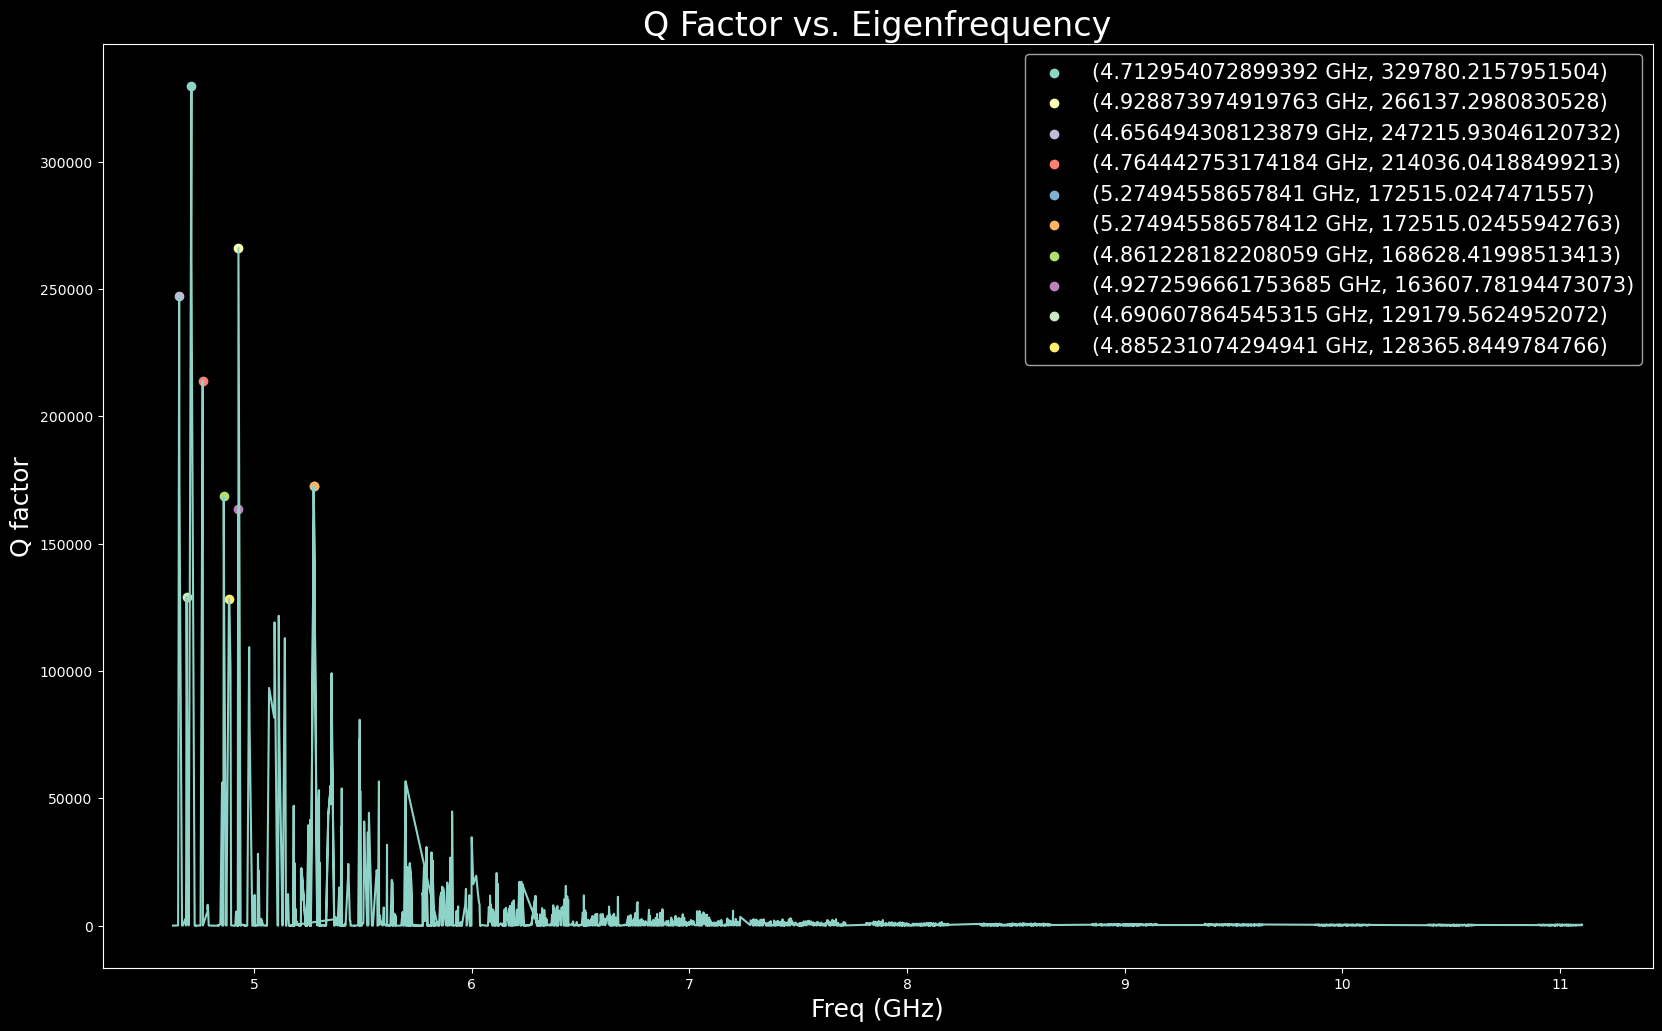

In [104]:
plt.figure(figsize = (20,12))
plot_Qvfreq(Q5to11)
for i in range(len(top_peaks)):
    plt.scatter(top_peaks['freqs'].loc[i], top_peaks['Q'].loc[i], 
                label = f'({top_peaks["freqs"][i]} GHz, {top_peaks["Q"][i]})')
plt.legend()